In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image, ImageFilter

In [2]:
!pip install pillow
!pip install rembg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 26.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.9/52.9 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 9.4 MB/s eta 0:00:00


#Ejercicio 1

 Escribir una función que reciba como parámetros dos strings, uno contendrá la ruta
para acceder a una imagen (Drive o URL), y el otro una palabra clave, que podrá ser
“Youtube, Instagram, Twitter o Facebook”. La función debe leer/abrir la foto y
redimensionar la imagen al tamaño adecuado especificado como parámetro para
cada una de las palabras clave (busque las dimensiones recomendadas de cada
aplicación).
Nota: Tenga en cuenta la escala, no queremos que la foto se distorsione.


In [27]:
#Declaro donde se van a guardar las imagenes para que no se sobreescriban las imagenes originales y asi es mas facil guardarlas
folder='/content/drive/MyDrive/Google Fotos/imagen_guardada.jpg'

In [25]:
def redimensionar_imagen(ruta, palabra):
    # Definir dimensiones recomendadas para las redes sociales
    dimensiones = {
        "Youtube": (1280, 720),
        "youube": (1280, 720),
        "YOUTUBE": (1280, 720),

        "Instagram": (1080, 1080),
        "instagram": (1080, 1080),
        "INSTAGRAM": (1080, 1080),

        "Twitter": (1024, 512),
        "twitter": (1024, 512),
        "TWITTER": (1024, 512),

        "Facebook": (1200, 628),
        "facebook": (1200, 628),
        "FACEBOOK": (1200, 628)
    }

    # Abrimos la imagen
    imagen =  cv2.imread(ruta, cv2.IMREAD_COLOR)

    # Obtener las dimension recomendada segun la red social y redimensionarla
    if palabra in dimensiones:
      imagen_redimensionada = cv2.resize(imagen, dimensiones[palabra])

    # Muestro imagen
    plt.subplot(121)
    plt.imshow(cv2.cvtColor(imagen_redimensionada, cv2.COLOR_BGR2RGB))

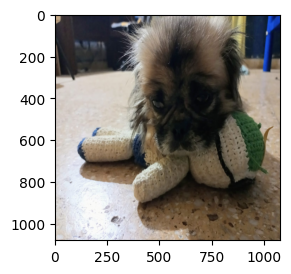

In [26]:
redimensionar_imagen('/content/drive/MyDrive/Google Fotos/indio2.jpg','instagram')

#Ejercicio 2


Crea una función que ajuste el contraste de la foto utilizando su histograma. Probala
con una foto oscura y con otra con exceso de luz. Muestra la foto original y la
ecualizada en una misma figura y guárdela en ambos casos (Adjuntar las figuras a la
solución del proyecto).


In [ ]:
def contraste(ruta):
    # Abrimos la imagen
    img = cv2.imread(ruta, cv2.IMREAD_GRAYSCALE)

    # Hago el histograma
    hist, bins = np.histogram(img.flatten(), 256, [0, 256])

    # Calcular la función de distribución acumulativa
    cdf = hist.cumsum()
    cdf_normalized = cdf * hist.max() / cdf.max()

    # Ecualizar la imagen
    img_ecualizada = np.interp(img.flatten(), bins[:-1], cdf_normalized)
    img_ecualizada = img_ecualizada.reshape(img.shape)

    # Mostrar las imágenes original y ecualizada
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(img, cmap='gray')
    plt.title('Imagen Original')

    plt.subplot(1, 2, 2)
    plt.imshow(img_ecualizada, cmap='gray')
    plt.title('Imagen Ecualizada')

    #Guardo las imagenes
    cv2.imwrite(folder, img)

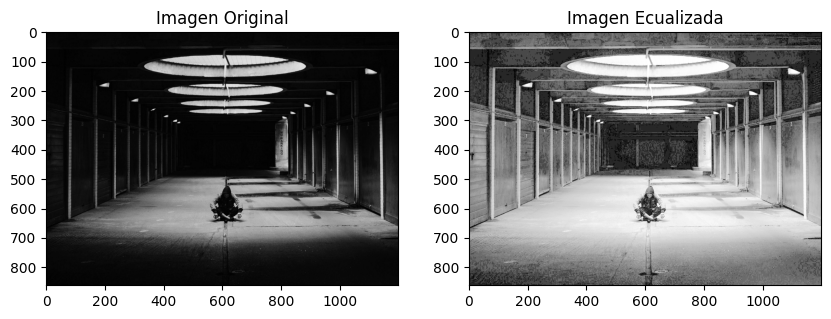

In [ ]:
# Imagen oscura
contraste('/content/drive/MyDrive/Google Fotos/FOTO-OSCURA.jpg')

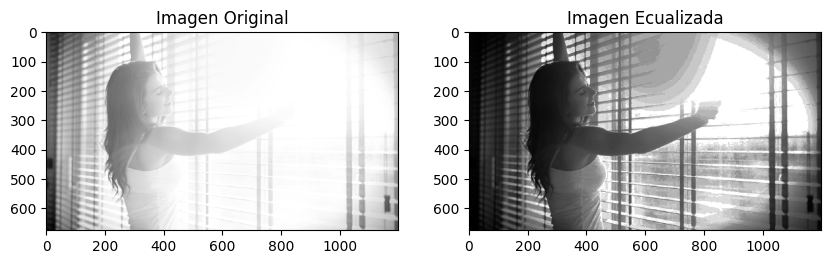

In [ ]:
# Imagen con exceso de luz
contraste('/content/drive/MyDrive/Google Fotos/FOTO-LUZ.jpg')

#Ejercicio 3

Programar una función que aplique los 9 filtros de Pillow de la siguiente tabla. La
función debe incluir en sus parámetros el nombre del filtro que el usuario quiere usar.
Muestra y guarda la foto resultante (adjuntar). Además, muestra la foto original y las
9 resultantes si se aplicaran todos los filtros en una misma figura y guárdela en
ambos casos (Adjuntar). Nota: Ponerle como título a cada foto el nombre del filtro, e
indique al usuario cuál fue el filtro que eligió (por ejemplo con el color del título
diferente).


In [ ]:
def filtros(ruta,filtro):
  # Abrimos la imagen
  img=Image.open(ruta)

  #Muestro la imagen original y la que tiene el filtro indicado
  plt.figure(figsize=(10, 5))
  plt.subplot(1, 2, 1)
  plt.imshow(img)
  plt.title('Imagen Original')

  plt.subplot(1, 2, 2)
  # Filtro BLUR
  if filtro=='BLUR':
    img_blur=img.filter(ImageFilter.BLUR)
    plt.imshow(img_blur)
    plt.title('Imagen Blur')
  # Filtro CONTOUR
  if filtro=='CONTOUR':
    img_contour=img.filter(ImageFilter.CONTOUR)
    plt.imshow(img_contour)
    plt.title('Imagen Contour')
  # Filtro DETAIL
  if filtro=='DETAIL':
    img_detail=img.filter(ImageFilter.DETAIL)
    plt.imshow(img_detail)
    plt.title('Imagen Detail')
  # Filtro EDGE ENHANCE
  if filtro=='EDGE_ENHANCE':
    img_edge_enhace=img.filter(ImageFilter.EDGE_ENHANCE)
    plt.imshow(img_edge_enhace)
    plt.title('Imagen Enhance')
  # Filtro EDGE ENHANCE MORE
  if filtro=='EDGE_ENHANCE_MORE':
    img_enhance_more=img.filter(ImageFilter.EDGE_ENHANCE_MORE)
    plt.imshow(img_enhance_more)
    plt.title('Imagen Enhance more')
  # Filtro EMBOSS
  if filtro=='EMBOSS':
    img_emboss=img.filter(ImageFilter.EMBOSS)
    plt.imshow(img_emboss)
    plt.title('Imagen Emboss')
  # Filtro FIND EDGES
  if filtro=='FIND_EDGES':
    img_find_edges=img.filter(ImageFilter.FIND_EDGES)
    plt.imshow(img_find_edges)
    plt.title('Imagen Find Edges')
  # Filtro SHARPEN
  if filtro=='SHARPEN':
    img_sharpen=img.filter(ImageFilter.SHARPEN)
    plt.imshow(img_sharpen)
    plt.title('Imagen Sharpen')
  # Filtro SMOOTH
  if filtro=='SMOOTH':
    img_smooth=img.filter(ImageFilter.SMOOTH)
    plt.imshow(img_smooth)
    plt.title('Imagen Smooth')

  fig, axs = plt.subplots(3, 3, figsize=(10, 10))
  axs[0, 0].imshow(img)
  axs[0, 0].set_title("Original", color='black')

  cont=0
  # Un bucle for para aplicar todos los filtros y mostrarlos
  for i in todosLosFiltros:
    imagen_filtrada = img.filter(i)
    axs[cont//3, cont%3].axis('off')
    axs[cont//3, cont%3].imshow(imagen_filtrada)
    fil=limpiarStr(str(i))
    axs[cont//3, cont%3].set_title(fil)
    cont+=1


In [ ]:
# Esta funcion la uso para que quede escrito de una mejor manera
def limpiarStr(string):
  string=string.replace('<class','')
  string=string.replace('PIL.ImageFilter.','')
  string=string.replace('>','')
  return(string)

In [ ]:
#Hice una lista con todos los filtros que iba a usar para que sea mas facil aplicarlos todos en el bucle for
todosLosFiltros = [ImageFilter.BLUR,
                   ImageFilter.CONTOUR,
                   ImageFilter.DETAIL,
                   ImageFilter.EDGE_ENHANCE,
                   ImageFilter.EDGE_ENHANCE_MORE,
                   ImageFilter.EMBOSS,
                   ImageFilter.FIND_EDGES,
                   ImageFilter.SHARPEN,
                   ImageFilter.SMOOTH]

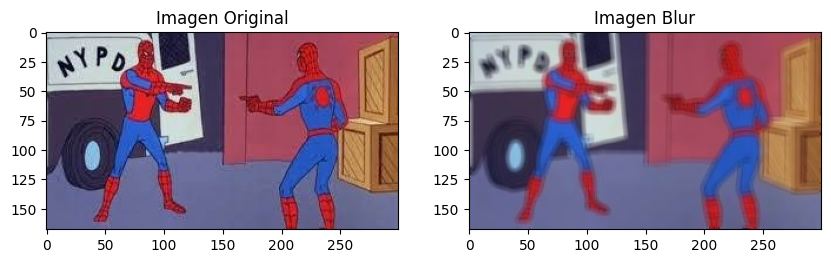

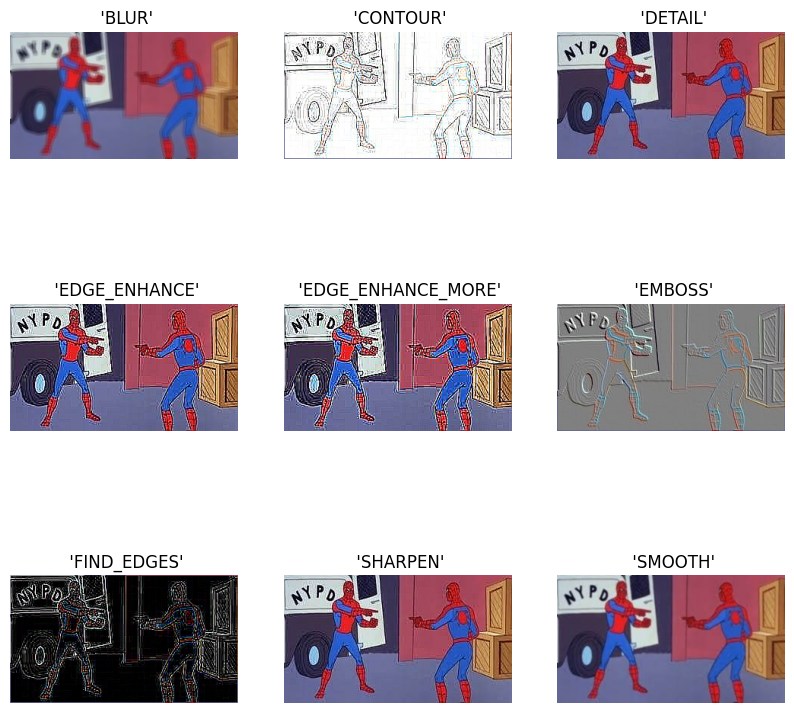

In [ ]:
filtros('/content/drive/MyDrive/Google Fotos/spiderman.jpeg','BLUR')

#Ejercicio 4

Se llevó a cabo un análisis de usuarios que demostró que el 35% de los posibles
futuros usuarios son pintores que compartirían fotos de sus trabajos allí, por lo cual
te pedimos que diseñes una funcionalidad en Python para asistirlos, el objetivo es
que cuando el algoritmo identifica con IA que la foto leída es de una persona
(suponga que hay otra función que ya ha hecho este paso previo con una variable
persona=True), ayude a los usuarios a dibujar el boceto de la persona de la foto.

Pruebe su función con una foto de un personaje de su elección.
El resultado puede ser una imagen binarizada como la del ejemplo (con fondo
blanco o negro), o una imagen que realce mucho los bordes… Usá tu creatividad y
justificá el resultado de tu función demostrando que sería la mejor herramienta para
los usuarios pintores/dibujantes comparando diferentes resultados

In [ ]:
def imagen_binarizada(ruta):
  # Abrimos la imagen
  img = cv2.imread(ruta, cv2.IMREAD_GRAYSCALE)
  # Detecto los bordes de la imagen
  boceto = cv2.Canny(img, 100, 300)
  # Muestro la imagen original y la binarizada
  plt.subplot(121)
  plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
  plt.title('Imagen Original')
  plt.subplot(122)
  plt.imshow(boceto, cmap='gray')
  plt.title('Imagen Binarizada')
  plt.show()

  # Yo creo que mi funcion de imagen binarizada es una buena herramienta para pintores y dibujantes
  # gracias a la funcion Canny de cv2 que resalta muy bien los bordes, entonces les facilita el trabajo a los mismos
  # En conclusion, funciona bien y es facil de usar :3

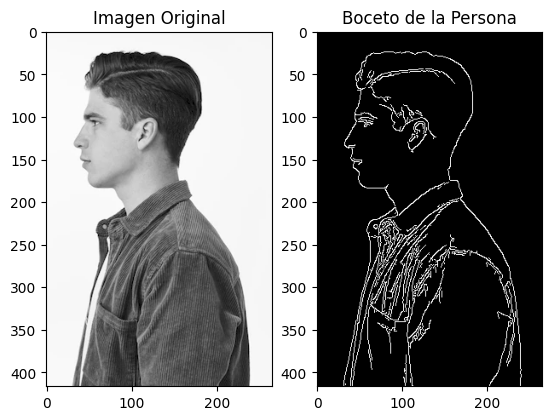

In [ ]:
imagen_binarizada('/content/drive/MyDrive/Google Fotos/persona.png')

#Ejercicio 5

Cree un menú de opciones que le permita al usuario hacer todas las operaciones,
tenga en cuenta que para todas las opciones es necesario pasar primero por la
función 1, por lo cual, asista al usuario para que no se salte la lectura de las
imágenes y use excepciones en sus funciones para validarlo.

In [ ]:
def funcion_1():
    # Indicamos la ruta
    ruta = input("Ingrese la ruta de la imagen: ")
    # Leemos la imagen, la achicamos y mostramos, si da error lanza la exepcion
    imagen =  cv2.imread(ruta, cv2.IMREAD_COLOR)
    imagen = cv2.resize(imagen, (10, 10))
    return ruta

In [ ]:
print("Menu de opciones:")
print("1. Redimensionar Imagen")
print("2. Ajustar Contraste")
print("3. Aplicar Filtro")
print("4. Dibujar Boceto de Persona")
print("5. Salir")

opcion = input("Seleccione una opción (1-5): ")

if opcion == '1':
  try:
    ruta = funcion_1()
    palabra = input("Ingrese la palabra clave (Youtube, Instagram, Twitter, Facebook): ")
    redimensionar_imagen(ruta, palabra)
  except Exception:
    print(f"Error: la ruta no es valida y no se pudo procesar una imagen o la palabra clave no es la indicada")

if opcion == '2':
  try:
    ruta = funcion_1()
    contraste(ruta)
  except Exception:
    print(f"Error: la ruta no es valida, no se pudo procesar una imagen")

if opcion == '3':
  try:
    ruta = funcion_1()
    filtro = input("Ingrese el nombre del filtro (por ejemplo, CONTOUR): ")
    aplicar_filtro(ruta,filtro)
  except Exception:
    print(f"Error: la ruta no es valida y no se pudo procesar una imagen o el filtro ingresado no es el indicado")


if opcion == '4':
  try:
    ruta = funcion_1()
    imagen_binarizada(ruta)
  except Exception:
    print(f"Error: la ruta no es valida, no se pudo procesar una imagen")

Menu de opciones:
1. Redimensionar Imagen
2. Ajustar Contraste
3. Aplicar Filtro
4. Dibujar Boceto de Persona
5. Salir
Seleccione una opción (1-5): 1
Ingrese la ruta de la imagen: carlos
Error: la ruta no es valida y no se pudo procesar una imagen o la palabra clave no es la indicada
